# 0.0 IMPORTS

In [41]:
import inflection
import math

import pandas                 as pd
import numpy                  as np
import datetime               as dt
import seaborn                as sns

from matplotlib import pyplot as plt

## 0.1 LOADING THE DATA

In [2]:
df_sales_raw = pd.read_csv('C:/Users/gabriel.ferreira/repos/rossmann/train.csv', low_memory = False)
df_store_raw = pd.read_csv('C:/Users\gabriel.ferreira/repos/rossmann/store.csv', low_memory = False)

#merge

df_raw = pd.merge(df_sales_raw, df_store_raw, how = 'left', on = 'Store')

In [3]:
df_raw.head().T

,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31,2015-07-31,2015-07-31,2015-07-31,2015-07-31
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
StoreType,c,a,a,c,a


# 1.0 DESCRIPTION DATA

In [4]:
df1 = df_raw.copy()

In [5]:
df1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


## 1.1 RENAME COLUMNS

In [6]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [7]:
#Rename the columns

cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snake_case = lambda x: inflection.underscore(x)

cols_new = list(map(snake_case, cols_old))

df1.columns = cols_new

df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 DIMENSIONS

In [8]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 1017209
Number of cols: 18


## 1.3 DATA TYPES

In [9]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

### 1.3.1 CHANGE TYPES

In [10]:
df1['date'] = pd.to_datetime(df1['date'])

## 1.4 CHECK NA

In [11]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 FILLOUT NA

In [12]:
#competition_distance

df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

#competition_open_since_month

df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis = 1 )

#competition_open_since_year

df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis = 1 )

#promo2_since_week

df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis = 1 )

#promo2_since_year

df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis = 1)

#promo_interval

month_map = {1: 'Jan',2: 'Fev',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}

df1['promo_interval'].fillna(0,inplace = True)

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval','month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis = 1)

df1.isna().sum()


store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 CHANCGE TYPES

In [16]:
#competition_open_since_month

df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(np.int64)

#competition_open_since_year

df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(np.int64)

#promo2_since_week

df1['promo2_since_week'] = df1['promo2_since_week'].astype(np.int64)

#promo2_since_year

df1['promo2_since_year'] = df1['promo2_since_year'].astype(np.int64)

df1.dtypes


store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 DESCRIPTIVE ESTATISCAL

In [19]:
num_attributes = df1.select_dtypes(include = ['int64','float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64','float64', 'datetime64[ns]'])

### 1.7.1 NUMERICAL ATTRIBUTES

In [36]:
#central tendency - mean and median

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T

ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#dispersion tendency - max, min, range, std, skew, kurtosis

d1 = pd.DataFrame(num_attributes.apply(max)).T

d2 = pd.DataFrame(num_attributes.apply(min)).T

d3 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T

d4 = pd.DataFrame(num_attributes.apply(np.std)).T

d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T

d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenate

columns = ['Features','Mean','Median','Max','Min','Range','Std','Skew','Kurtosis']

df_concat = pd.concat([ct1,ct2,d1,d2,d3,d4,d5,d6]).T.reset_index()

df_concat.columns = columns

df_concat



,Features,Mean,Median,Max,Min,Range,Std,Skew,Kurtosis
0,store,558.429727,558.0,1115.0,1.0,1114.0,321.908493,-0.000955,-1.200524
1,day_of_week,3.998341,4.0,7.0,1.0,6.0,1.997390,0.001593,-1.246873
2,sales,5773.818972,5744.0,41551.0,0.0,41551.0,3849.924283,0.641460,1.778375
3,customers,633.145946,609.0,7388.0,0.0,7388.0,464.411506,1.598650,7.091773
4,open,0.830107,1.0,1.0,0.0,1.0,0.375539,-1.758045,1.090723
5,promo,0.381515,0.0,1.0,0.0,1.0,0.485758,0.487838,-1.762018
6,school_holiday,0.178647,0.0,1.0,0.0,1.0,0.383056,1.677842,0.815154
7,competition_distance,5935.442677,2330.0,200000.0,20.0,199980.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,6.786849,7.0,12.0,1.0,11.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,2010.324840,2012.0,2015.0,1900.0,115.0,5.515591,-7.235657,124.071304


### 1.7.2 CATEGORICAL ATTRIBUTES

In [38]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

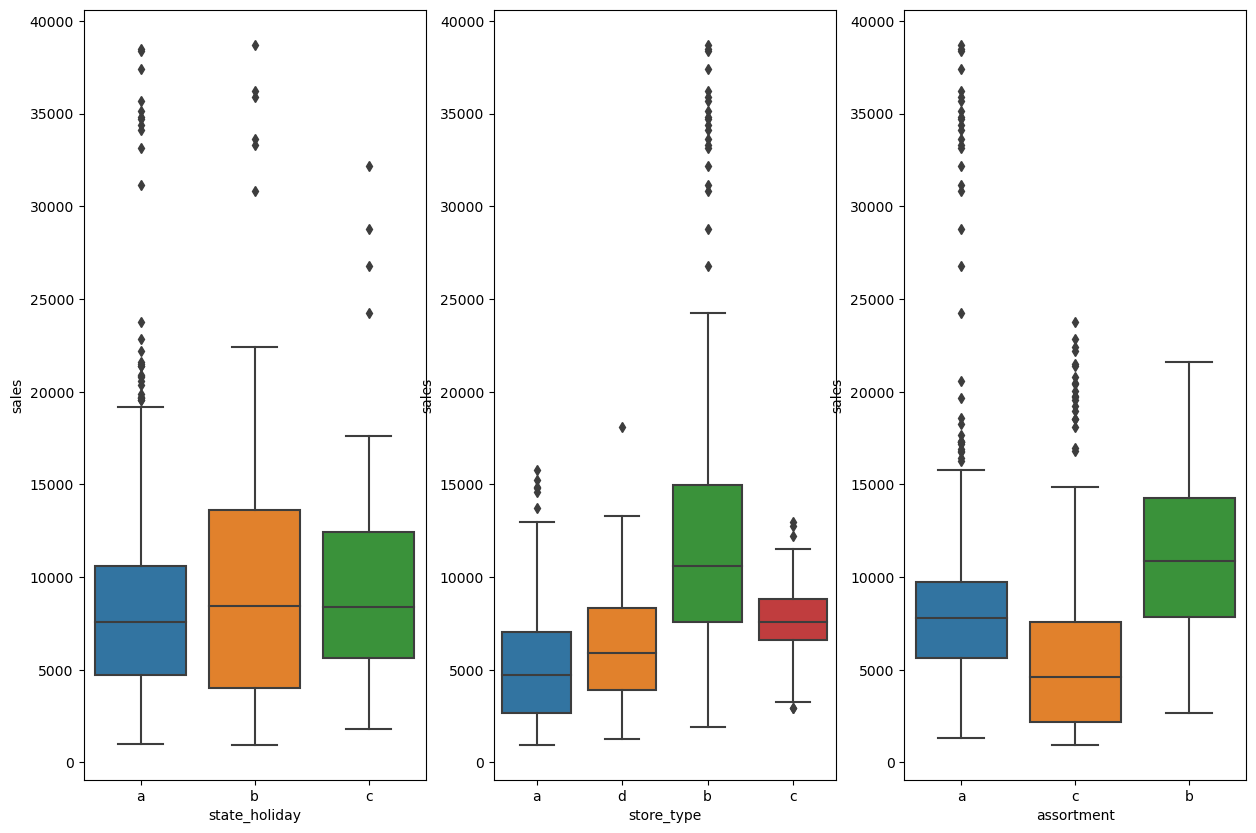

In [46]:
plt.figure(figsize = (15,10))

aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot(1,3,1)

sns.boxplot(x = 'state_holiday', y = 'sales', data = aux1)

plt.subplot(1,3,2)

sns.boxplot(x = 'store_type', y = 'sales', data = aux1)

plt.subplot(1,3,3)

sns.boxplot(x = 'assortment', y = 'sales', data = aux1)